In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

df_movies = pd.read_csv('data/movies.csv')
df_ratings = pd.read_csv('data/ratings.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
print(df_movies.shape)
print(df_ratings.shape)

(9742, 3)
(100836, 4)


### 1. 사용자가 평가한 모든 영화의 전체 평균 평점을 출력하세요

In [5]:
df_ratings['rating'].mean()

3.501556983616962

### 2. 각 사용자별 평균 평점을 구하세요. 출력시 정렬은 userid로 오름차순 정렬

In [6]:
df_ratings['userId'].value_counts(sort=False)

1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: userId, Length: 610, dtype: int64

In [7]:
filt = df_ratings[['userId', 'rating']].groupby('userId').mean()
filt

,rating
userId,
1,4.366379
2,3.948276
3,2.435897
4,3.555556
5,3.636364
...,...
606,3.657399
607,3.786096
608,3.134176


<AxesSubplot:ylabel='Frequency'>

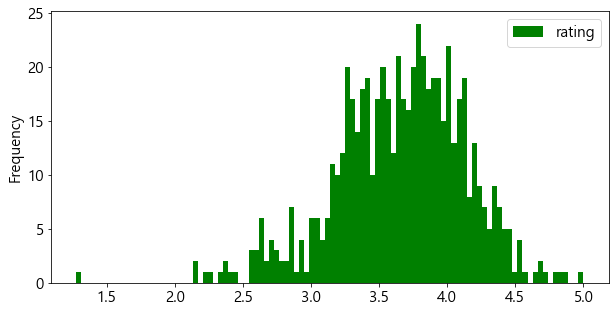

In [8]:
filt.plot(kind='hist', bins=100, color='green', figsize=(10,5))

### 3. 각 영화별 평균 평점을 구하세요. 출력시 정렬은 movieId로 오름차순 정렬합니다.

In [9]:
df_ratings['movieId'].value_counts(sort=False)

1         215
3          52
6         102
47        203
50        204
         ... 
160341      1
160527      1
160836      1
163937      1
163981      1
Name: movieId, Length: 9724, dtype: int64

In [10]:
df_a = df_movies
df_b = df_ratings

df_c = df_b[['movieId', 'rating']].groupby('movieId').mean()
df_c = df_c.reset_index()
df_c

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [11]:
df = pd.merge(df_a, df_c, on='movieId', how='left')
df[['movieId', 'title', 'rating']]

,movieId,title,rating
0,1,Toy Story (1995),3.920930
1,2,Jumanji (1995),3.431818
2,3,Grumpier Old Men (1995),3.259615
3,4,Waiting to Exhale (1995),2.357143
4,5,Father of the Bride Part II (1995),3.071429
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),4.000000
9738,193583,No Game No Life: Zero (2017),3.500000
9739,193585,Flint (2017),3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),3.500000


<AxesSubplot:xlabel='rating', ylabel='movieId'>

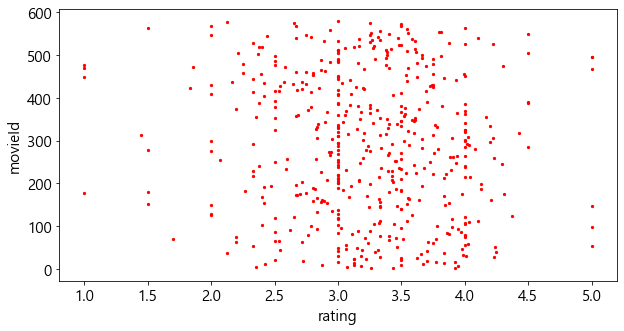

In [90]:
df[:500].plot(kind='scatter', x='rating', y='movieId', color='red',s=5 ,figsize=(10,5))

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 0 to 9723
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   movieId  9724 non-null   int64         
 1   rating   9724 non-null   float64       
 2   date     9724 non-null   datetime64[ns]
 3   title    9724 non-null   object        
 4   genres   9724 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 455.8+ KB


### 4. 평균 평점이 가장 높은 영화의 제목을 출력하세요.<br>단, 동률이 있을 경우 모두 출력하고 title을 기준으로 오름차순 정렬하세요.

In [13]:
df_a = df_ratings[['movieId', 'rating']].groupby('movieId').mean()
df_a = pd.DataFrame(df_a)
df = pd.merge(df_movies, df_a, on='movieId', how='inner')
df

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9721,193585,Flint (2017),Drama,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [14]:
df = df[df['rating'] >= 5.0]
df_a = df.drop(['genres'], axis=1, inplace=False)
df_a.sort_values('title', ascending=True)

,movieId,title,rating
5677,27751,'Salem's Lot (2004),5.0
7315,77846,12 Angry Men (1997),5.0
9028,141816,12 Chairs (1976),5.0
3888,5468,20 Million Miles to Earth (1957),5.0
5626,27373,61* (2001),5.0
...,...,...,...
9693,187717,Won't You Be My Neighbor? (2018),5.0
8337,108795,Wonder Woman (2009),5.0
9271,158398,World of Glory (1991),5.0
9542,173351,Wow! A Talking Fish! (1983),5.0


### 5. Comedy영화 중 가장 평점이 낮은 영화의 제목을 출력하세요.<br>단, 동률이 있을 경우 모두 출력하고 title을 기준으로 오름차순 정렬하세요.

In [15]:
df_a = df_ratings[['movieId', 'rating']].groupby('movieId').mean()

In [16]:
df = pd.merge(df_movies, df_a, on='movieId', how='left')
filt1 = df['genres'].str.contains('Comedy')
filt2 = df['rating'] <= 0.5

In [17]:
df = df[filt1][filt2]
df.sort_values('title', ascending=True)

,movieId,title,genres,rating
8893,134528,Aloha (2015),Comedy|Drama|Romance,0.5
5777,31422,Are We There Yet? (2005),Children|Comedy,0.5
7762,91414,Arthur Christmas (2011),Animation|Children|Comedy|Drama,0.5
9419,165645,Bad Santa 2 (2016),Comedy,0.5
4439,6557,Born to Be Wild (1995),Adventure|Children|Comedy|Drama,0.5
5409,25782,Boudu Saved From Drowning (Boudu sauvé des eau...,Comedy,0.5
6554,54934,"Brothers Solomon, The (2007)",Comedy,0.5
5453,26095,"Carabineers, The (Carabiniers, Les) (1963)",Comedy|Drama|War,0.5
6545,54768,Daddy Day Camp (2007),Children|Comedy,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5


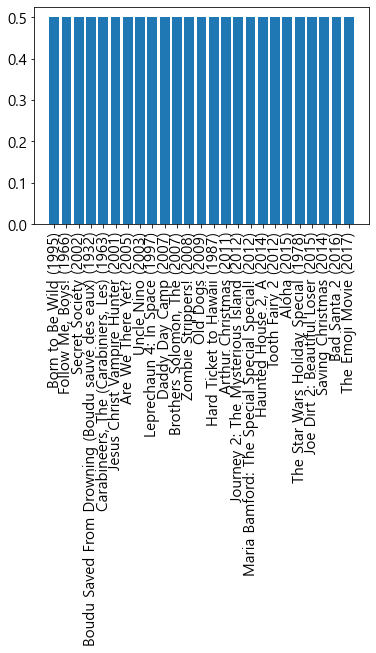

In [18]:
filt1 = df['title'][df['genres'].str.contains('Comedy')]
filt2 = df['rating']

plt.bar(filt1[:50], filt2[:50])
plt.xticks(rotation=90)
plt.show()

### 6. 2015년도에 평가된 모든 Romance 영화의 평균 평점은?

In [19]:
from datetime import datetime

df_a = pd.DataFrame(df_ratings)
df_a['date'] = pd.to_datetime(df_a['timestamp'], unit='s')
df_a['date'] = pd.to_datetime(df_a['date'].dt.strftime('%Y%m%d'))
df_a

,userId,movieId,rating,timestamp,date
0,1,1,4.0,964982703,2000-07-30
1,1,3,4.0,964981247,2000-07-30
2,1,6,4.0,964982224,2000-07-30
3,1,47,5.0,964983815,2000-07-30
4,1,50,5.0,964982931,2000-07-30
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,2017-05-03
100832,610,168248,5.0,1493850091,2017-05-03
100833,610,168250,5.0,1494273047,2017-05-08
100834,610,168252,5.0,1493846352,2017-05-03


In [20]:
df = pd.merge(df_movies, df_a, on='movieId', how='left')
df

,movieId,title,genres,userId,rating,timestamp,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,2000-07-30
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,1996-11-08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09,2005-01-25
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09,2017-11-13
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09,2011-05-18
...,...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09,2018-09-16
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09,2018-09-16
100851,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09,2018-09-16
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09,2018-09-16


In [21]:
df['year'] = df['date'].dt.year
filt1 = df['year'] == 2015
filt2 = df['genres'].str.contains('Romance')

In [22]:
df[filt1][filt2]['rating'].mean()

3.396375098502758

### 7. 모든 영화장르 중 사용자 평점이 가장 좋은 영화장르는 무엇인가요?<br> 동률이 있으면 영화장르를 기준으로 오름차순 정렬하세요.

In [23]:
df_a = df_ratings
df_b = df_movies

In [24]:
df = pd.merge(df_a, df_b, on='movieId', how='left')
df

,userId,movieId,rating,timestamp,date,title,genres
0,1,1,4.0,964982703,2000-07-30,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,2000-07-30,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,2000-07-30,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,2000-07-30,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,2000-07-30,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,2017-05-03,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,2017-05-03,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,2017-05-08,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,2017-05-03,Logan (2017),Action|Sci-Fi


In [25]:
df_a = df[['movieId', 'rating']].groupby('movieId').mean()
df_a.reset_index()

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [26]:
df_b = df.drop(['rating', 'userId', 'timestamp'], axis=1)
df_b = df_b.sort_values('movieId')
df_b = df_b.drop_duplicates(subset='movieId', keep='first', inplace=False, ignore_index=False)

In [27]:
df = pd.merge(df_a, df_b, on='movieId', how='left')

In [28]:
filt = df['rating'] == 5.0
df[filt].sort_values('genres', ascending=True)

,movieId,rating,date,title,genres
9593,176601,5.0,2018-05-08,Black Mirror,(no genres listed)
9120,147250,5.0,2018-05-13,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed)
9500,171749,5.0,2018-05-13,Death Note: Desu nôto (2006–2007),(no genres listed)
1646,2196,5.0,2005-02-21,Knock Off (1998),Action
3754,5244,5.0,2006-10-26,Shogun Assassin (1980),Action|Adventure
...,...,...,...,...,...
6478,53280,5.0,2018-03-07,"Breed, The (2006)",Horror|Thriller
4240,6192,5.0,2003-09-11,Open Hearts (Elsker dig for evigt) (2002),Romance
5334,8911,5.0,2009-02-09,Raise Your Voice (2004),Romance
3888,5468,5.0,2012-06-22,20 Million Miles to Earth (1957),Sci-Fi


### 시간별 영화 평점

In [79]:
import pandas as pd
import seaborn as sns
from datetime import datetime

In [94]:
df_movies = pd.read_csv('data/movies.csv')
df_ratings = pd.read_csv('data/ratings.csv')
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_ratings['hour']=df_ratings['timestamp'].dt.hour
res = df_ratings[['hour', 'rating']].groupby('hour', as_index=False).mean()
res

,hour,rating
0,0,3.462732
1,1,3.457653
2,2,3.455112
3,3,3.498943
4,4,3.508400
5,5,3.669719
6,6,3.612777
7,7,3.608588
8,8,3.659585
9,9,3.437818


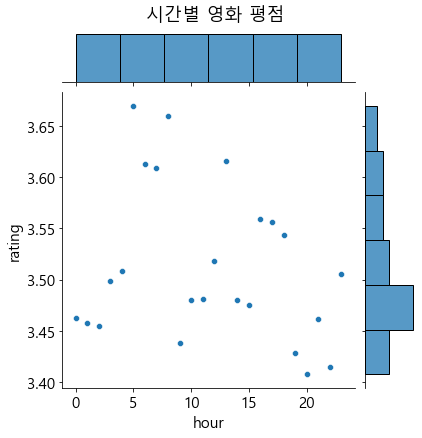

In [95]:
sns.jointplot(x="hour", y="rating", data=res)
plt.suptitle("시간별 영화 평점", y=1.02)
plt.show()

In [97]:
df_movies = pd.read_csv('data/movies.csv')
df_ratings = pd.read_csv('data/ratings.csv')

print(df_movies.isna().sum())
print(df_ratings.isna().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [98]:
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_ratings['year'] = df_ratings['timestamp'].dt.year
df_ratings

,userId,movieId,rating,timestamp,year
0,1,1,4.0,2000-07-30 18:45:03,2000
1,1,3,4.0,2000-07-30 18:20:47,2000
2,1,6,4.0,2000-07-30 18:37:04,2000
3,1,47,5.0,2000-07-30 19:03:35,2000
4,1,50,5.0,2000-07-30 18:48:51,2000
...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,2017
100832,610,168248,5.0,2017-05-03 22:21:31,2017
100833,610,168250,5.0,2017-05-08 19:50:47,2017
100834,610,168252,5.0,2017-05-03 21:19:12,2017


### 연도별 영화 평균 평점

In [103]:
res = np.round(df_ratings[['rating', 'year']].groupby('year')['rating'].mean(), 2)
res = res.reset_index()
res

,year,rating
0,1996,3.54
1,1997,3.73
2,1998,3.44
3,1999,3.77
4,2000,3.39
5,2001,3.51
6,2002,3.61
7,2003,3.50
8,2004,3.51
9,2005,3.43


Text(0, 0.5, '평점')

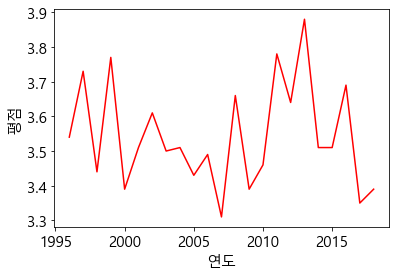

In [278]:
plt.plot(res['year'], res['rating'], color='red')
plt.xlabel('연도')
plt.ylabel('평점')

### 평점을 많이 받은 영화

In [304]:
df_movies = pd.read_csv('data/movies.csv', index_col='movieId')
df_ratings = pd.read_csv('data/ratings.csv')

In [287]:
res = df_ratings.groupby('movieId')['userId'].count()
res.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [288]:
df = pd.DataFrame({
    'ratings_count': df_ratings.groupby('movieId')['userId'].count(),
})
df

,ratings_count
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [289]:
df['m_name'] = df.apply(lambda x: df_movies['title'].loc[x.index])

In [291]:
df.sort_values(by='ratings_count', ascending=False)

,ratings_count,m_name
movieId,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"
...,...,...
4093,1,Cop (1988)
4089,1,Born in East L.A. (1987)
58351,1,City of Men (Cidade dos Homens) (2007)


### 평점 데이터 통계

In [105]:
n_users = df_ratings['userId'].nunique()
n_users

610

In [302]:
n_moives = df_ratings['movieId'].nunique()
n_moives

9724

In [307]:
print('평점 평균: {}'.format(df_ratings['rating'].mean()))
print('평점 표준편차: {}'.format(df_ratings['rating'].std()))

평점 평균: 3.501556983616962
평점 표준편차: 1.0425292390605359


In [311]:
df_ratings['rating'].describe().to_frame()

,rating
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


array([[<AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'movieId'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>]],
      dtype=object)

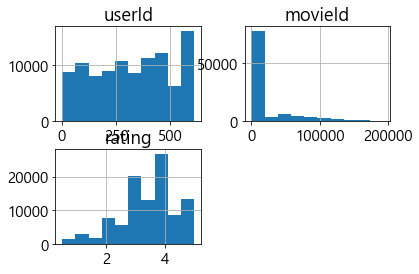

In [312]:
df_ratings[['userId', 'movieId', 'rating']].hist()

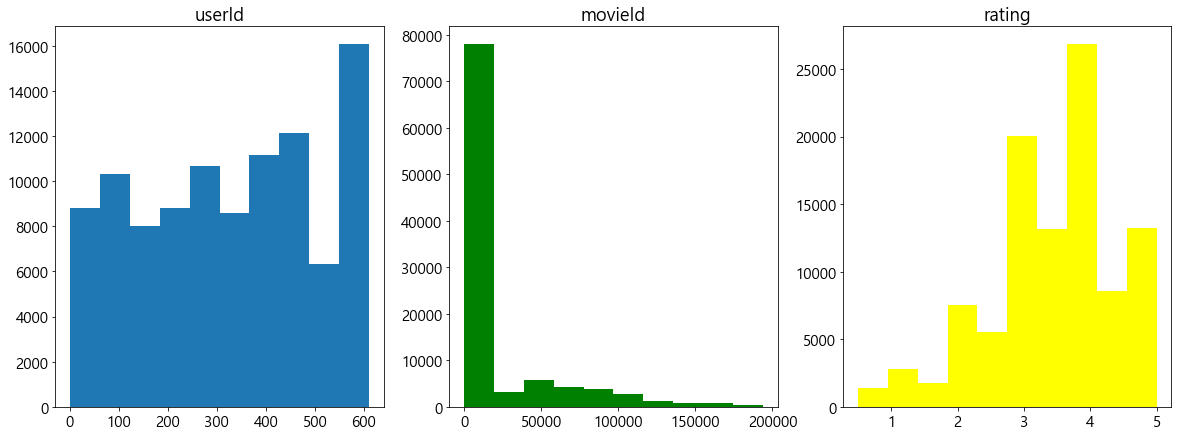

In [329]:
f, ax = plt.subplots(1, 3, figsize=(20, 7))
ax[0].hist(df_ratings['userId'])
ax[0].set_title('userId')

ax[1].hist(df_ratings['movieId'], color='green')
ax[1].set_title('movieId')

ax[2].hist(df_ratings['rating'], color='yellow')
ax[2].set_title('rating')

plt.show()

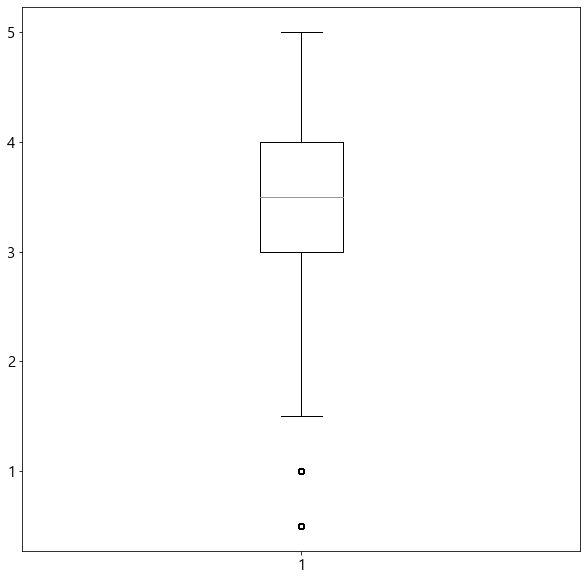

In [331]:
ratings = df_ratings['rating'].values
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(ratings)
plt.show()

### 장르별 상관관계

In [108]:
all_genres = [x.split('|') for x in df_movies['genres'].values]
all_genres

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Comedy'],
 ['Comedy'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Drama', 'Romance'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Drama'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Children', 'Drama'],
 ['Crime', 'Drama'],
 ['Children', 'Comedy'],
 

In [252]:
import itertools
genres = list(set(list(itertools.chain(*all_genres))))
print(len(all_genres))
print(len(genres))
print(genres)

9742
20
['IMAX', 'Action', 'Documentary', 'Animation', 'Western', 'War', 'Crime', 'Drama', 'Romance', 'Film-Noir', 'Comedy', 'Children', 'Fantasy', 'Mystery', '(no genres listed)', 'Thriller', 'Musical', 'Sci-Fi', 'Adventure', 'Horror']


In [253]:
df_genres = pd.DataFrame(columns=genres, index=df_movies.index)
df_genres.head()

,IMAX,Action,Documentary,Animation,Western,War,Crime,Drama,Romance,Film-Noir,Comedy,Children,Fantasy,Mystery,(no genres listed),Thriller,Musical,Sci-Fi,Adventure,Horror
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
df_genres = df_movies['genres'].str.get_dummies(sep='|')
df_genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [246]:
df_movies = pd.concat([df_movies, df_genres], axis=1)
df_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

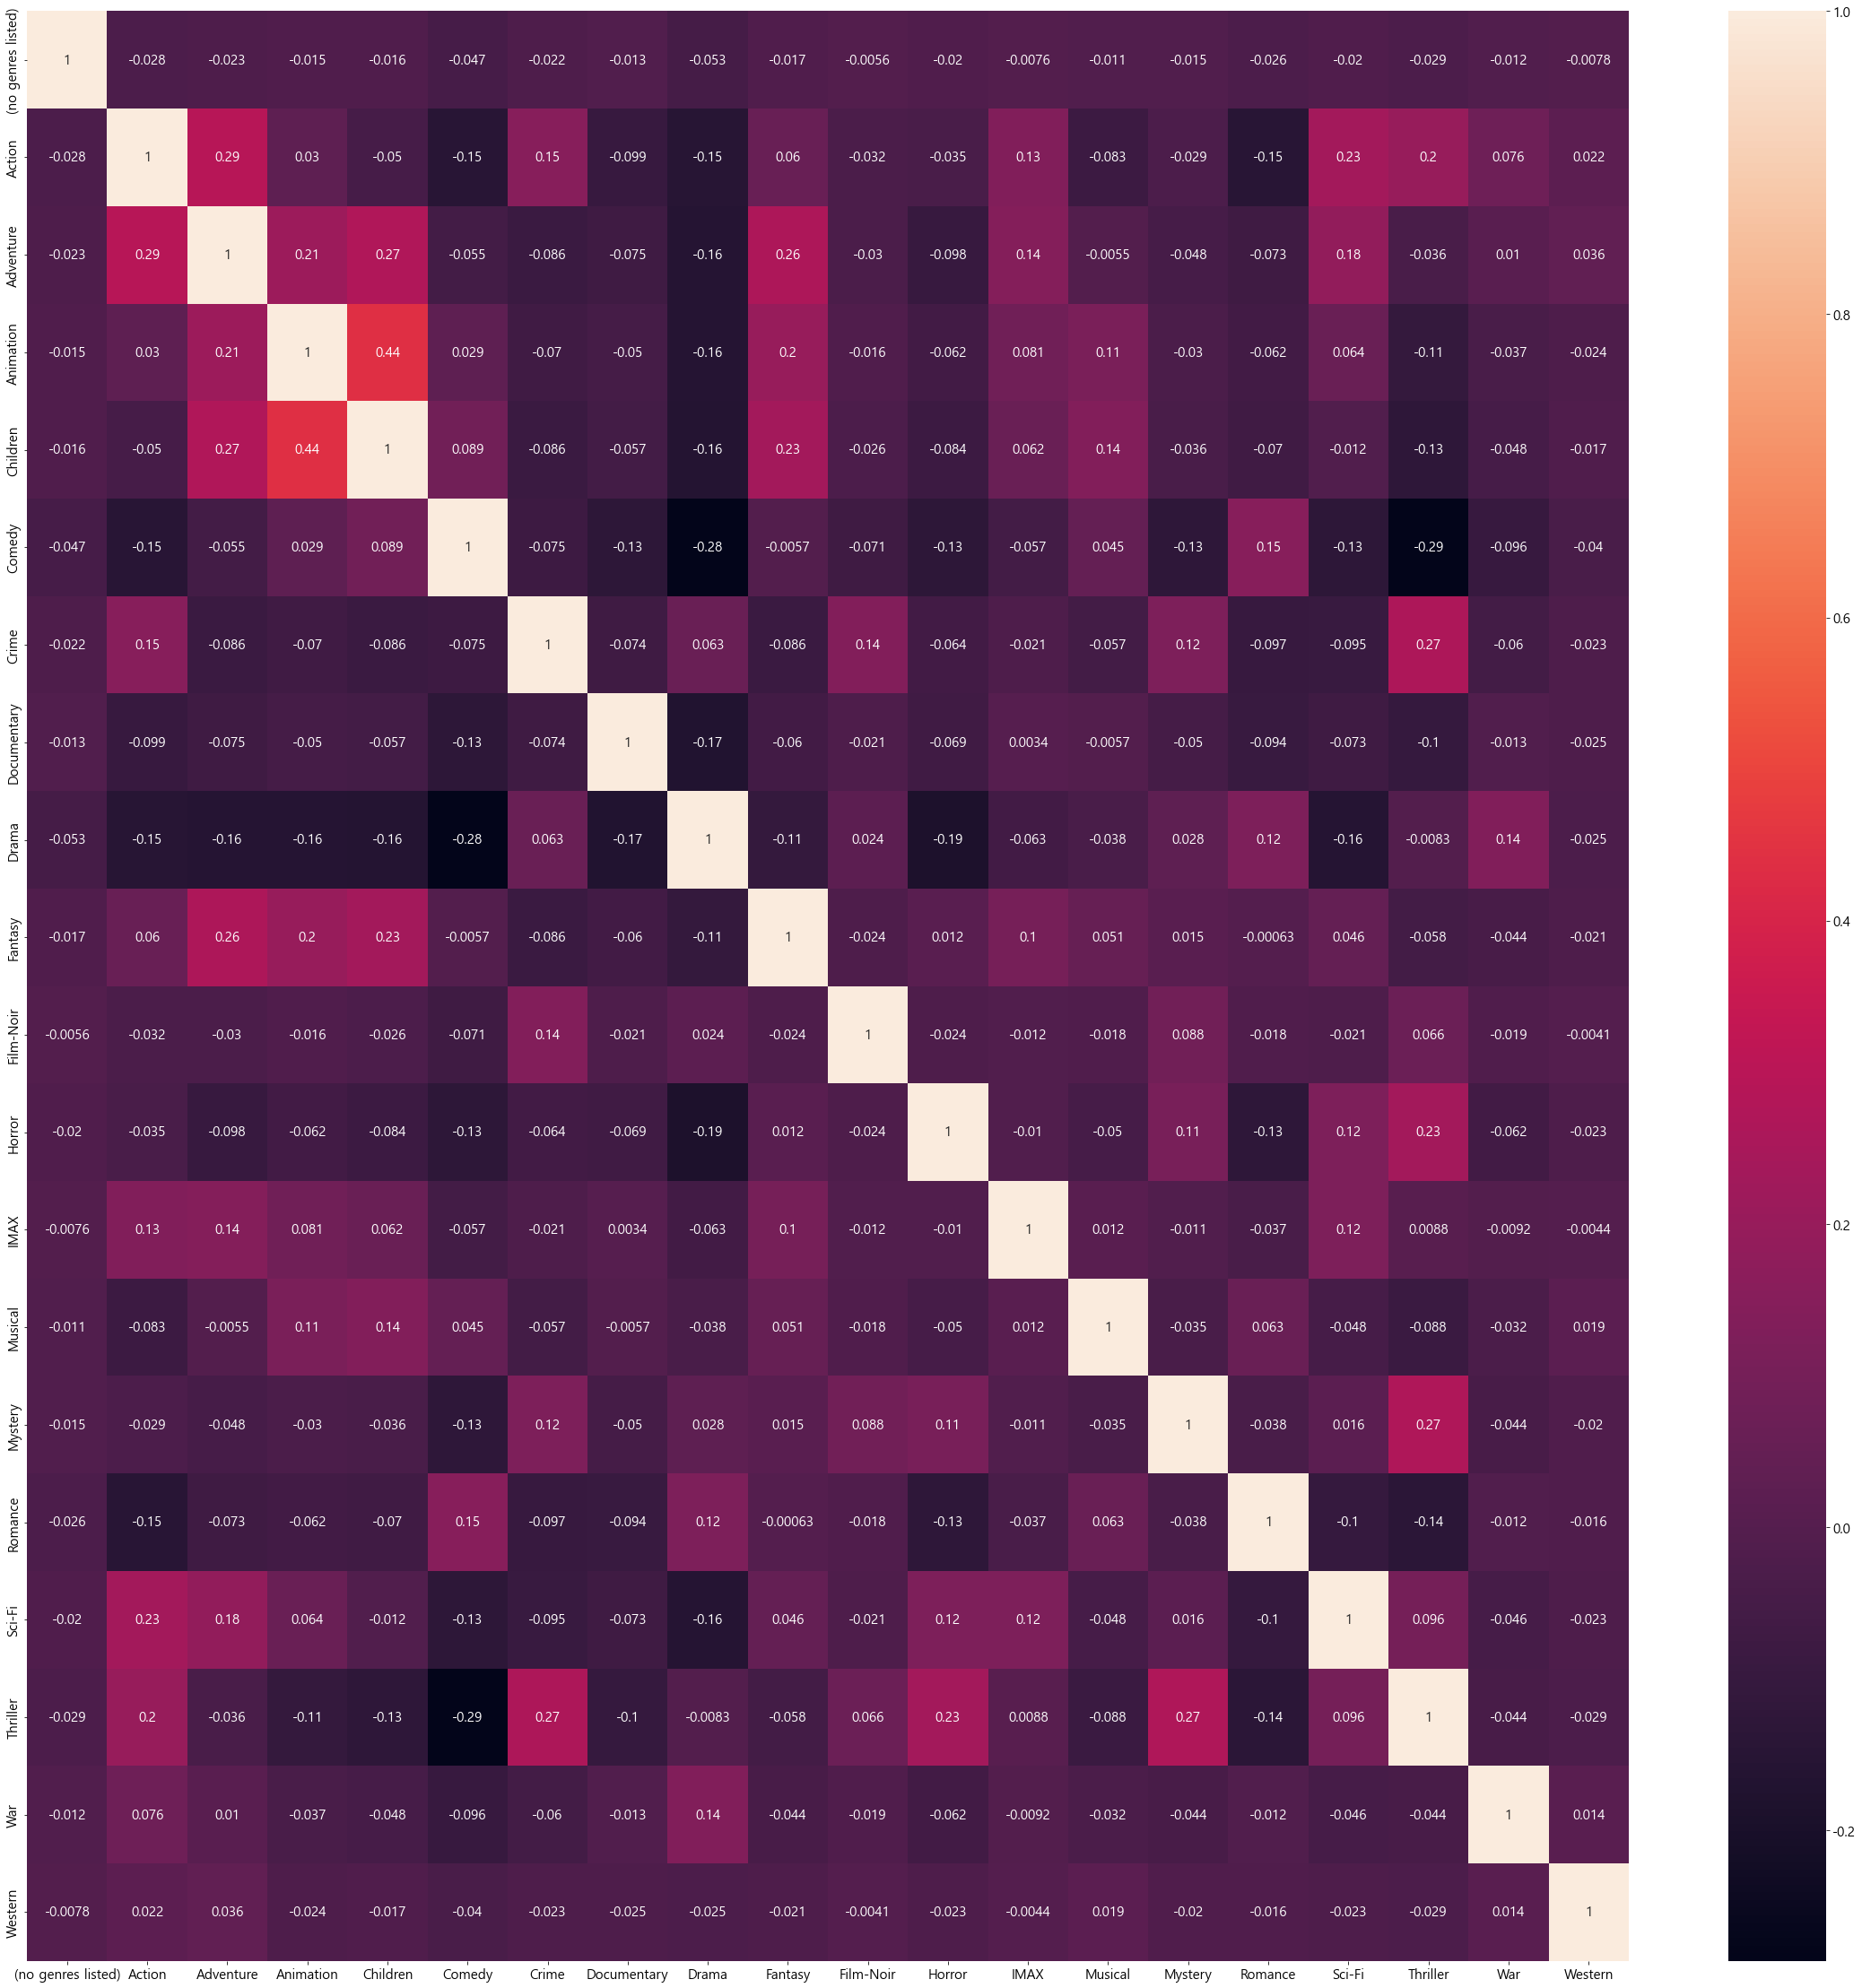

In [255]:
df_genres.corr()
plt.figure(figsize=(40,40))
sns.heatmap(df_genres.corr(), annot=True)